In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Daten Reihe der Erarbeitung 1958 – 1987

# API Key für FRED 
- https://fred.stlouisfed.org/docs/api/fred/

In [2]:
# Import or assign API key
api_key = 'd9ce385a3f807aaba9590769b5f994a1'

## Herunterladen der daten wie folgt 
- m1_dataURL    =  M1 
- GDP für die   =  BIP der USA
- GDP in %      = GDP der USA prozenutal
- Oil Preise    = Öl Preise
- CPI           = Consumer Price Index 

In [3]:
# Setting the data urls:
# GDP Daten von den vereinigten Staaten

m1_dataURL = f'https://api.stlouisfed.org/fred/series/observations?series_id=M1SL&api_key={api_key}&file_type=json&frequency=a'
GDP_dataURL = f'https://api.stlouisfed.org/fred/series/observations?series_id=GDP&api_key={api_key}&file_type=json&frequency=a'
GDP_per_dataURL = f'https://api.stlouisfed.org/fred/series/observations?series_id=GDP&api_key={api_key}&file_type=json&frequency=a&units=pch'
OIL_dataURL = f'https://api.stlouisfed.org/fred/series/observations?series_id=POILBREUSDM&api_key={api_key}&file_type=json&frequency=a'
CPI_dataURL = f'https://api.stlouisfed.org/fred/series/observations?series_id=MEDCPIM158SFRBCLE&api_key={api_key}&file_type=json&frequency=a'
print(GDP_per_dataURL)

https://api.stlouisfed.org/fred/series/observations?series_id=GDP&api_key=d9ce385a3f807aaba9590769b5f994a1&file_type=json&frequency=a&units=pch


## Funktion um die Daten von der URL herunter zu laden

In [4]:
import requests
import json
import pandas as pd

# Setzen Sie Ihren API-Schlüssel hier ein

def get_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        observations = []
        for observation in data['observations']:
            date = observation['date']
            value = observation['value']
            if value != '.':
                value = float(value)
                observations.append({'Date': date, 'Value': value})
        df = pd.DataFrame(observations)
        return df
    else:
        print(f'Error: {response.status_code}')
        return None

## CSV Daten hinzufügen

In [5]:
# OPEC oil price annually 1960-2024;
# Average annual OPEC crude oil price(in U.S. dollars per barrel);

Oil_price_his = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/models/Linear Regression/Data_USA/Oil_price_1960.csv', 
            on_bad_lines='skip', skiprows=2,
            sep=';', decimal=',')

Oil_price_his.rename(columns={'Unnamed: 0': 'Date', 'Unnamed: 1': 'Oil_Price'}, inplace=True)
Oil_price_his['Oil_Price'] = Oil_price_his['Oil_Price'].astype(float)
Oil_price_his['Date'] = pd.to_datetime(Oil_price_his['Date'], format='%Y')

In [8]:
CPI_USA_his = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/models/Linear Regression/Data_USA/CPI_USA_1960.csv',
sep=';', on_bad_lines='skip', decimal=',', )
CPI_USA_his['CPI'] = CPI_USA_his['CPI'].astype(float)
CPI_USA_his.info()
CPI_USA_his.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    61 non-null     int64  
 1   CPI     61 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


,Year,CPI
0,1960,1.457976
1,1961,1.070724
2,1962,1.198773
3,1963,1.239669
4,1964,1.278912


## Daten von der API hinzufügen

In [9]:
df_GDP = get_data(GDP_dataURL)
#df_oil = get_data(OIL_dataURL)
df_cpi = get_data(CPI_dataURL)
df_m1 = get_data(m1_dataURL)
df_GDP_per = get_data(GDP_per_dataURL)

# Zeitreihen betrachtung von min bis max

In [11]:
print('BIP USA:',          df_GDP['Date'].min(),       'bis', df_GDP_per['Date'].max())
print('M1 der USA:',        df_m1['Date'].min(),        'bis',df_m1['Date'].max())
print('BIP in % der USA:',   df_GDP_per['Date'].min(),   'bis',df_GDP_per['Date'].max())
print('Öl Preis Historisch:',Oil_price_his['Date'].min(), 'bis',Oil_price_his['Date'].max())
print('CPI Historisch:',     CPI_USA_his['Year'].min(),  'bis',CPI_USA_his['Year'].max())

BIP USA: 1947-01-01 bis 2023-01-01
M1 der USA: 1959-01-01 bis 2023-01-01
BIP in % der USA: 1948-01-01 bis 2023-01-01
Öl Preis Historisch: 1960-01-01 00:00:00 bis 2023-01-01 00:00:00
CPI Historisch: 1960 bis 2022


In [12]:
df_m1.rename(columns={'Value': 'M1'}, inplace=True)
df_cpi.rename(columns={'Value': 'CPI Index'}, inplace=True)
df_GDP.rename(columns={'Value': 'GDP'}, inplace=True)
df_GDP_per.rename(columns={'Value': 'GDP Change'}, inplace=True)


In [13]:
def df_to_datetime(df):
    df['Date'] = pd.to_datetime(df['Date'])
    
    return df

def change_year_format(df):
    df['Year'] = df['Date'].dt.strftime('%Y')
    df = df.drop(columns=['Date'])
    return df

df_GDP = df_to_datetime(df_GDP)
#df_oil = df_to_datetime(df_oil)
df_cpi = df_to_datetime(df_cpi)
df_m1 = df_to_datetime(df_m1)
df_GDP_per = df_to_datetime(df_GDP_per)
Oil_price_his = df_to_datetime(Oil_price_his)

df_GDP = change_year_format(df_GDP)
#df_oil = change_year_format(df_oil)
df_cpi = change_year_format(df_cpi)
df_m1 = change_year_format(df_m1)
df_GDP_per = change_year_format(df_GDP_per)
Oil_price_his = change_year_format(Oil_price_his)



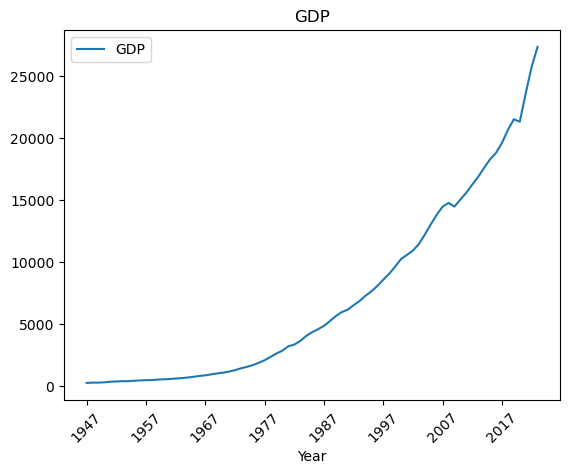

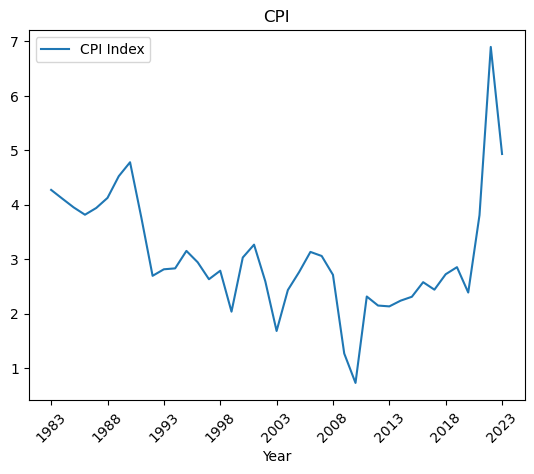

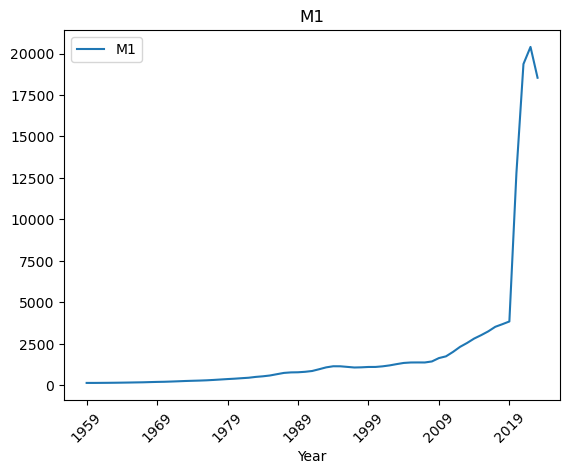

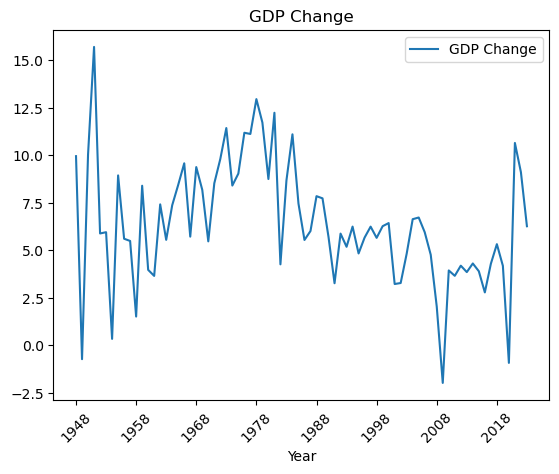

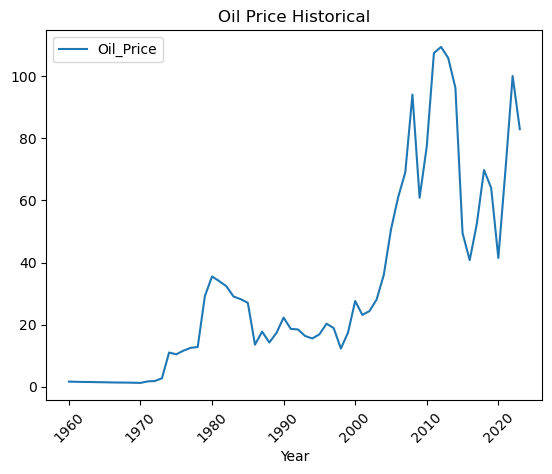

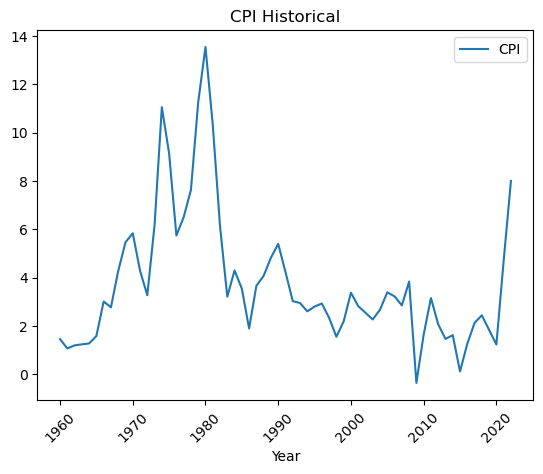

In [14]:
def plot(df, title, column):
    df.plot(x='Year', y=column, kind='line', title=title)
    plt.xticks(rotation=45)
    plt.show()

plot(df_GDP, 'GDP', 'GDP')
#plot(df_oil, 'Oil', 'Oil_price')
plot(df_cpi, 'CPI', 'CPI Index')
plot(df_m1, 'M1', 'M1')
plot(df_GDP_per, 'GDP Change', 'GDP Change')
#Oil_price_his.plot(x='Date', y='Oil_Price', figsize=(12, 6))
plot(Oil_price_his, 'Oil Price Historical', 'Oil_Price')
plot(CPI_USA_his, 'CPI Historical', 'CPI')


In [16]:
# Vor der Fusionierung die 'Year'-Spalte in allen DataFrames in Ganzzahlen umwandeln
df_GDP['Year'] = pd.to_numeric(df_GDP['Year'], errors='coerce')
#df_cpi['Year'] = pd.to_numeric(df_cpi['Year'], errors='coerce')
df_m1['Year'] = pd.to_numeric(df_m1['Year'], errors='coerce')
df_GDP_per['Year'] = pd.to_numeric(df_GDP_per['Year'], errors='coerce')
Oil_price_his['Year'] = pd.to_numeric(Oil_price_his['Year'], errors='coerce')
CPI_USA_his['Year'] = pd.to_numeric(CPI_USA_his['Year'], errors='coerce')

# Merge DataFrames basierend auf der 'Year'-Spalte
#merged_df = df_GDP.merge(df_cpi, on='Year', how='inner')
merged_df = df_GDP.merge(df_m1, on='Year', how='inner')
merged_df = merged_df.merge(df_GDP_per, on='Year', how='inner')
merged_df = merged_df.merge(Oil_price_his, on='Year', how='inner')
merged_df = merged_df.merge(CPI_USA_his, on='Year', how='inner')

# Speichere den zusammengeführten DataFrame in eine CSV-Datei
merged_df.to_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/models/Linear Regression/Data_USA/merged_df.csv', index=False)


In [17]:
merged_df.head()

,GDP,Year,M1,GDP Change,Oil_Price,CPI
0,542.382,1960,140.3,3.97351,1.63,1.457976
1,562.210,1961,143.1,3.65563,1.57,1.070724
2,603.922,1962,146.5,7.41925,1.52,1.198773
3,637.452,1963,151.0,5.55205,1.50,1.239669
4,684.462,1964,156.8,7.37468,1.45,1.278912


In [18]:
merged_df.corr()

,GDP,Year,M1,GDP Change,Oil_Price,CPI
GDP,1.000000,0.962959,0.688807,-0.477972,0.827875,-0.306596
Year,0.962959,1.000000,0.562783,-0.476614,0.806438,-0.262044
M1,0.688807,0.562783,1.000000,-0.062930,0.473231,0.010533
GDP Change,-0.477972,-0.476614,-0.062930,1.000000,-0.361864,0.626022
Oil_Price,0.827875,0.806438,0.473231,-0.361864,1.000000,-0.109868
CPI,-0.306596,-0.262044,0.010533,0.626022,-0.109868,1.000000


/Users/riccardo/anaconda3/envs/model/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/riccardo/anaconda3/envs/model/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/riccardo/anaconda3/envs/model/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/riccardo/anaconda3/envs/model/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

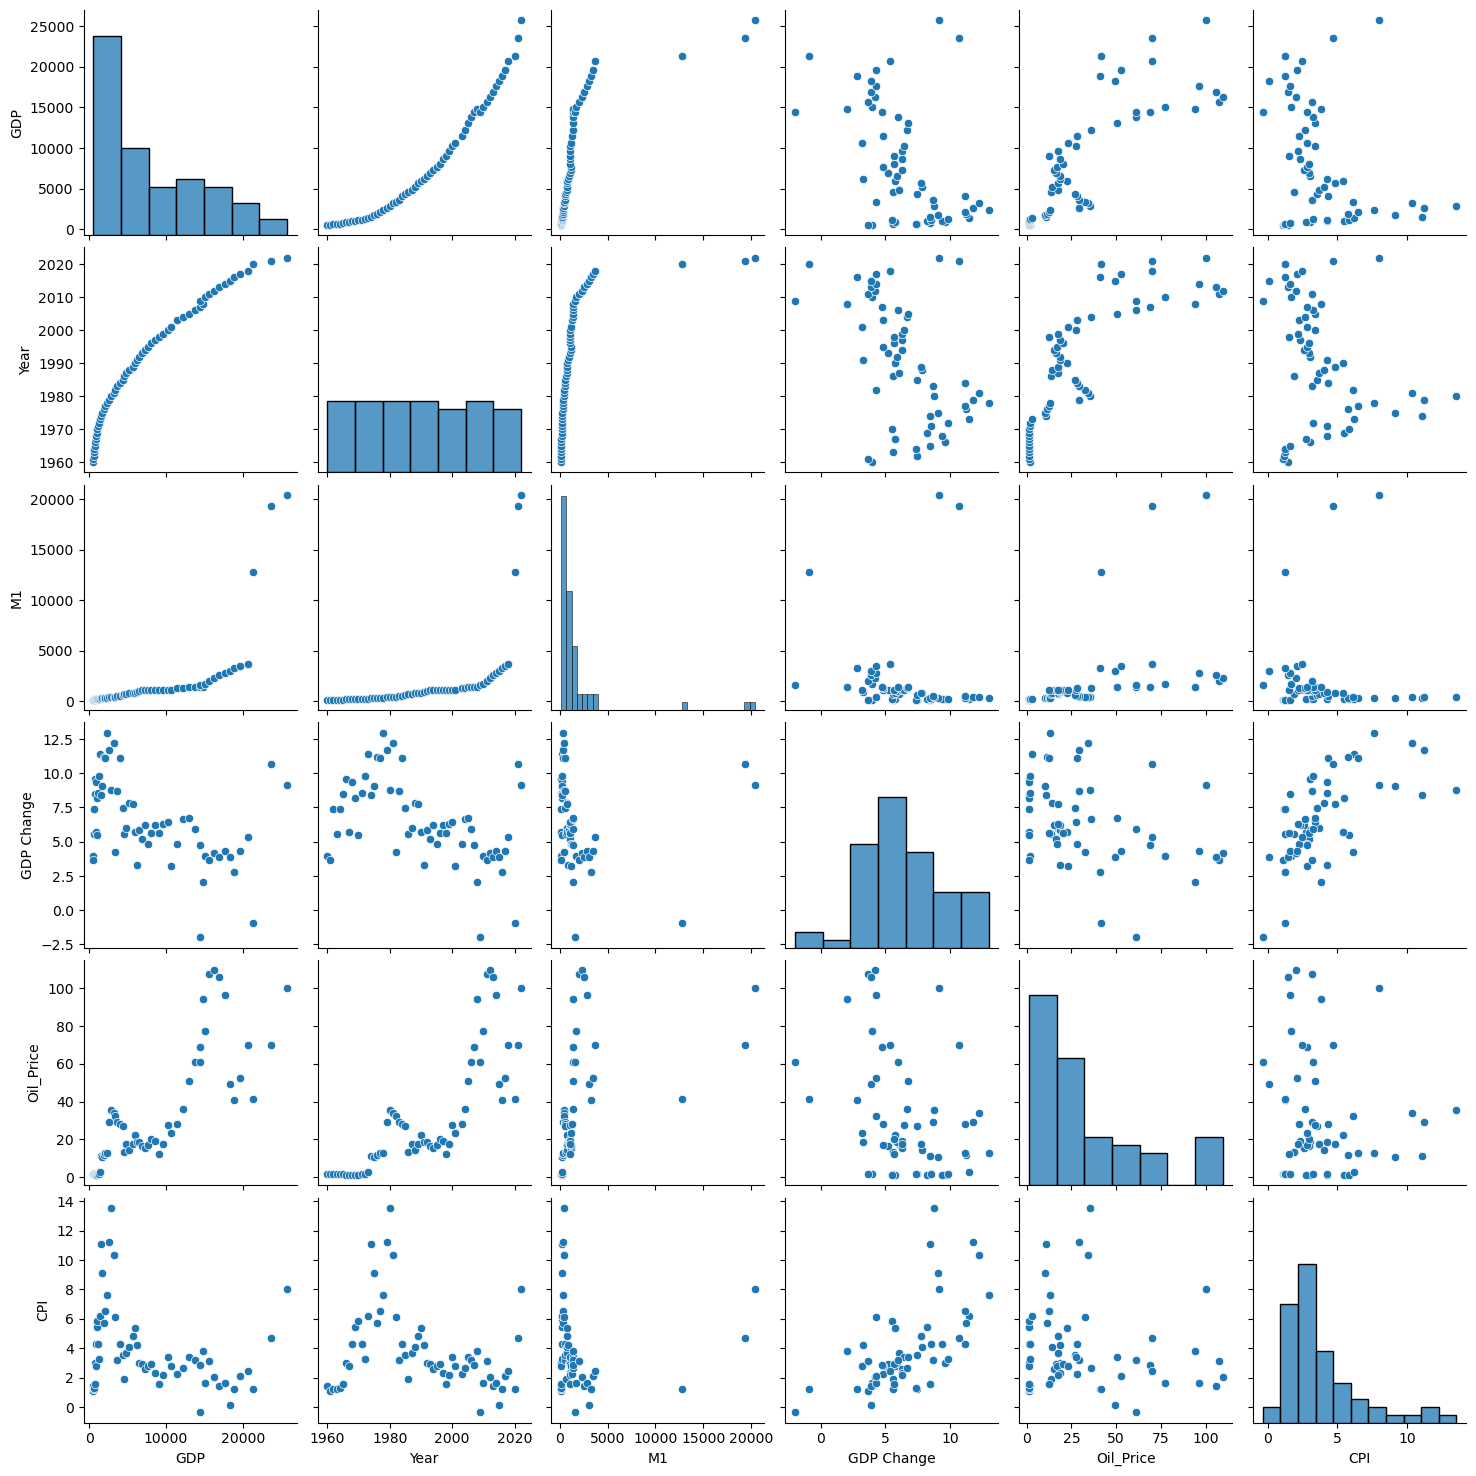

In [19]:
sns.pairplot(merged_df)
